# Metodo de descenso mas rápido

### Para el metodo de descenso mas rapido y el método de gradiente conjugado la matriz del sistema debe ser
### simétrica definida positiva

In [114]:
import numpy as np
A= np.array([[5,1,2],[1,5,3],[2,3,6]],dtype='f4')
b = np.array([[8],[9],[11]],dtype='f4')
x = np.zeros_like(b)
y = np.zeros_like(b)
max_iter=100
tol = 1e-5
for i in range(max_iter): # es un metodo lento
    v = b-A@x #residuo
    if (np.linalg.norm(v,2)<tol): # error < tolerancia
        break    
    t = np.dot(v.T,v)/np.dot(v.T,A@v)     
    x = x + t*v    
print(f"Converge en {i} iteraciones")

Converge en 20 iteraciones


### Comprobamos que Ax=b

In [115]:
A@x-b

array([[-9.5367432e-07],
       [-3.8146973e-06],
       [ 1.9073486e-06]], dtype=float32)

In [116]:
np.linalg.norm(A@x-b,2)

4.370285e-06

# Metodo de gradiente conjugado

In [117]:
import numpy as np
A= np.array([[5,1,2],[1,5,3],[2,3,6]],dtype='f4')
b = np.array([[8],[9],[11]],dtype='f4')
x = np.zeros_like(b)
r = b - A@x
v = r
c = np.dot(r.T,r)
tol = 1e-5
max_iter=100
for i in range(max_iter):   
    if (np.linalg.norm(v,2)<1e-16):
        break
    z = A@v
    t = c/np.dot(v.T,z)    
    x= x + t*v
    r = r - t*z
    d = np.dot(r.T,r)
    if (np.sqrt(d)<tol):
        break
    v= r + (d/c)*v
    c= d   
print(f"Converge en {i} iteraciones")

Converge en 2 iteraciones


### Comprobamos que Ax=b

In [118]:
A@x-b

array([[9.5367432e-07],
       [1.9073486e-06],
       [1.9073486e-06]], dtype=float32)

In [119]:
np.linalg.norm(A@x-b,2)

2.861023e-06

# Metodo SOR

In [91]:
A= np.array([[4,2,1],[1,5,3],[1,3,6]],dtype='f4')
b = np.array([[7],[9],[10]],dtype='f4')
w = 0.7
# w=1 -> SOR == GS
def metodoSOR(A,b,w):
    M = 100
    tol = 1e-5
    x = np.zeros_like(b)
    y = np.zeros_like(b)
    n = len(b)    
    for k in range(M):
        for i in range(n):
            x[i,0] =  ( w*(b[i,0] - np.dot(y[i+1:n,0] , A[i,i+1:n])-np.dot(x[0:i,0] , A[i,0:i])) )/A[i,i] + (1-w)*y[i,0]      
        error = np.linalg.norm(x-y,np.inf)  
        if (error<tol):
            break
        y[:,:] = x[:,:] 
    return (x,k)


In [92]:
vector_w =[]
vector_k = []
num_w= 21
for i in range(1,num_w):
    w = 2.0*i/num_w
    (x,k)= metodoSOR(A,b,w)
    vector_w = vector_w + [w]
    vector_k = vector_k + [k]

### Graficamos iteraciones vs w -> hay un w optimo cerca de w=1

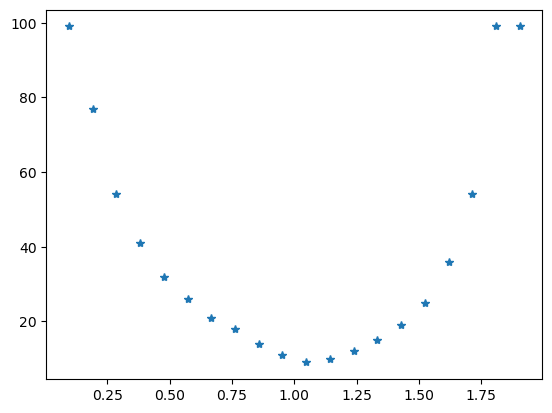

In [93]:
import matplotlib.pyplot as plt
plt.plot(vector_w,vector_k,'*')